# Case study for male wages in 1980

## Part 1. Understanding the data and importing into Python for analysis

The data set contains information regarding the monthly earnings, employment history, education, demographic characteristics, black or not black, and other similar information for 935 men in the year 1980.

In [1]:
# Import libraries
import csv
import statistics
import pandas as pd

# Read CSV file
wage = pd.read_csv(r'D:\Github\Learning Project 1 Python\WAGE2.csv',
                   index_col = False, delimiter =',')

# Rename count column to obs & fill NaN
wage = wage.rename(columns={'0':'obs'})
wage = wage.fillna(0)

In [2]:
print(wage)

     obs  wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  \
0      0   769     40   93   35    12     11       2   31        1      0   
1      1   808     50  119   41    18     11      16   37        1      0   
2      2   825     40  108   46    14     11       9   33        1      0   
3      3   650     40   96   32    12     13       7   32        1      0   
4      4   562     40   74   27    11     14       5   34        1      0   
..   ...   ...    ...  ...  ...   ...    ...     ...  ...      ...    ...   
930  930   520     40   79   28    16      6       1   30        1      1   
931  931  1202     40  102   32    13     10       3   31        1      0   
932  932   538     45   77   22    12     12      10   28        1      1   
933  933   873     44  109   25    12     12      12   28        1      0   
934  934  1000     40  107   32    12     17      18   35        1      0   

     south  urban  sibs  brthord  meduc  feduc     lwage  
0        0      

## Part 2. Diving into analysis:
## Did black men earn less than non-black men?

This section will focus on highlighting and proving the wage desparity between black and non-black men. We can accomplish this by conducting a two sample T-test. This will allow us to see how accurate the sample is to the representing population. 

#### Step 1. Generate the mean of variable wage for black and nonblack men.

Before performing the T-test, it is valuable to find the mean variable wages of nonblack and black men to see if within the sample exist a difference. We can also use the results in to perform the T-test. 

In [3]:
wage_blackm = wage[wage.black == 1]
wage_blackm.describe()



,obs,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000
mean,586.150000,735.841667,41.900000,86.075000,30.158333,12.441667,12.200000,6.200000,32.791667,0.850000,1.0,0.633333,0.800000,4.775000,2.191667,7.37500,4.616667,6.524434
std,238.191564,295.930891,6.587995,15.455636,7.575941,1.738326,4.650111,4.666347,3.140668,0.358569,0.0,0.483915,0.401677,3.025001,2.185882,4.40409,4.770680,0.393924
min,5.000000,260.000000,20.000000,50.000000,14.000000,9.000000,1.000000,0.000000,28.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.560682
25%,465.750000,509.500000,40.000000,74.000000,24.750000,12.000000,9.000000,2.000000,30.000000,1.000000,1.0,0.000000,1.000000,2.000000,1.000000,5.75000,0.000000,6.233429
50%,615.000000,683.500000,40.000000,85.000000,30.000000,12.000000,13.000000,5.000000,32.000000,1.000000,1.0,1.000000,1.000000,5.000000,1.000000,8.00000,4.000000,6.527150
75%,813.000000,940.000000,40.750000,96.250000,36.000000,13.000000,16.000000,10.000000,36.000000,1.000000,1.0,1.000000,1.000000,7.000000,3.000000,11.00000,8.250000,6.845880
max,932.000000,1874.000000,64.000000,127.000000,49.000000,18.000000,22.000000,16.000000,38.000000,1.000000,1.0,1.000000,1.000000,13.000000,9.000000,18.00000,18.000000,7.535831


In [4]:
wage_whitem = wage[wage.black == 0]
wage_whitem.describe()

,obs,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.0,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,449.456442,990.647853,44.228221,103.521472,36.566871,13.619632,11.469939,7.386503,33.122699,0.899387,0.0,0.298160,0.705521,2.671166,2.057669,10.147239,8.609816,6.816486
std,270.159395,408.002749,7.269264,13.636352,7.299667,2.217333,4.327646,5.117688,3.102612,0.301001,0.0,0.457731,0.456088,2.048512,1.562887,3.839266,4.923983,0.412145
min,0.000000,115.000000,25.000000,54.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.744932
25%,213.500000,702.500000,40.000000,95.000000,32.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,8.000000,6.000000,6.554639
50%,435.000000,938.000000,40.000000,104.000000,37.000000,13.000000,11.000000,7.000000,33.000000,1.000000,0.0,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.843750
75%,692.500000,1200.000000,48.000000,113.000000,41.500000,16.000000,15.000000,11.000000,36.000000,1.000000,0.0,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.090077
max,934.000000,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,0.0,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


In [12]:
blackm_count = round(wage_blackm['obs'].count(), 3)
blackm_avgwage = round(wage_blackm['lwage'].sum() / wage_blackm['obs'].count(), 3)
blackm_stddev = round(statistics.stdev(wage_blackm['lwage']), 3)
blackm_min = round(min(wage_blackm['lwage']), 3)
blackm_max = round(max(wage_blackm['lwage']), 3)

whitem_count = round(wage_whitem['obs'].count(), 3)
whitem_avgwage = round(wage_whitem['lwage'].sum() / wage_whitem['obs'].count(), 3)
whitem_stddev = round(statistics.stdev(wage_whitem['lwage']), 3)
whitem_min = round(min(wage_whitem['lwage']), 3)
whitem_max = round(max(wage_whitem['lwage']), 3)

print(" Black male sample size:", blackm_count, "\n",
      "Black male sample average log wage:", blackm_avgwage, "\n",
      "Black male sample standard deviation log wage:", blackm_stddev, "\n",
      "Black male sample minimum log wage:", blackm_min, "\n",
      "Black male sample maximum log wage:", blackm_max, "\n")

print(" White male sample size:", whitem_count, "\n",
      "White male sample average log wage:", whitem_avgwage, "\n",
      "White male sample standard deviation log wage:", whitem_stddev, "\n",
      "White male sample minimum log wage:", whitem_min, "\n",
      "White male sample maximum log wage:", whitem_max, "\n")

 Black male sample size: 120 
 Black male sample average log wage: 6.524 
 Black male sample standard deviation log wage: 0.394 
 Black male sample minimum log wage: 5.561 
 Black male sample maximum log wage: 7.536 

 White male sample size: 815 
 White male sample average log wage: 6.816 
 White male sample standard deviation log wage: 0.412 
 White male sample minimum log wage: 4.745 
 White male sample maximum log wage: 8.032 



#### Step 2. Write down a null and alternative hypothesis.

Ho:E(Y) = 0 or the Null Hypothesis. This result means that wages of black and nonblack men are equal

Ho:E(Y) /= 0 or the Alternative Hypothesis. This result means that wages of black and nonblack men are not equal

#### Step 3. Perform a T-test

There are many ways to perform a T-test, the quickest way is to use the formulas and algebra with the data given from the SQL queries previously.

A T-test produces two outputs, the Degrees of Freedom and the T-value.

In [14]:
# T-Test
import math 

DF = (whitem_count + blackm_count) - 2 
TValue = round((whitem_avgwage - blackm_avgwage) / math.sqrt(((whitem_stddev**2) / whitem_count) + ((blackm_stddev**2) / blackm_count)),3)

print("The Degrees of Freedom is ",DF)
print("The T-Value is ",TValue)

The Degrees of Freedom is  933
The T-Value is  7.535


We can use the results of the T-test to reject or accept the Null Hypothesis at a certain confidence interval. In layman terms, a confidence interval is the level of confidence that this sample is representative of the actual population.

Here is a cheat sheet for using DF and T-Value. http://simulation-math.com/TDistTable.pdf.

From our data, we are 99.95% confident that the sample data represents the actual wage difference of black and non-black men. And on average, black men have a lower wage of 4.28% per month compared to nonblack men.

#### Step 4. Dive deeper on why black men are paid less.

Well great, it doesn't take a rocket-scientist to know that black men were paid less in 1980. 

One theory explaining the wage disparity for black men during this time was education disparity. We can perform another T-test to examine the education difference between black and non-black men.

#### Step 5. Generate the mean of education years for black and nonblack men.

In [16]:
educ_blackm_count = round(wage_blackm['obs'].count(), 3)
educ_blackm_avgwage = round(wage_blackm['educ'].sum() / wage_blackm['obs'].count(), 3)
educ_blackm_stddev = round(statistics.stdev(wage_blackm['educ']), 3)
educ_blackm_min = round(min(wage_blackm['educ']), 3)
educ_blackm_max = round(max(wage_blackm['educ']), 3)

educ_whitem_count = round(wage_whitem['obs'].count(), 3)
educ_whitem_avgwage = round(wage_whitem['educ'].sum() / wage_whitem['obs'].count(), 3)
educ_whitem_stddev = round(statistics.stdev(wage_whitem['educ']), 3)
educ_whitem_min = round(min(wage_whitem['educ']), 3)
educ_whitem_max = round(max(wage_whitem['educ']), 3)

print(" Black male sample size:", educ_blackm_count, "\n",
      "Black male sample average education:", educ_blackm_avgwage, "\n",
      "Black male sample standard deviation education:", educ_blackm_stddev, "\n",
      "Black male sample minimum education:", educ_blackm_min, "\n",
      "Black male sample maximum education:", educ_blackm_max, "\n")

print(" White male sample size:", educ_whitem_count, "\n",
      "White male sample average education:", educ_whitem_avgwage, "\n",
      "White male sample standard deviation education:", educ_whitem_stddev, "\n",
      "White male sample minimum education:", educ_whitem_min, "\n",
      "White male sample maximum education:", educ_whitem_max, "\n")

 Black male sample size: 120 
 Black male sample average education: 12.442 
 Black male sample standard deviation education: 1.738 
 Black male sample minimum education: 9 
 Black male sample maximum education: 18 

 White male sample size: 815 
 White male sample average education: 13.62 
 White male sample standard deviation education: 2.217 
 White male sample minimum education: 9 
 White male sample maximum education: 18 



#### Step 6. Write down a null and alternative hypothesis.

Ho:E(Y) = 0 or the Null Hypothesis. This result means that education of black and nonblack men are equal

Ho:E(Y) /= 0 or the Alternative Hypothesis. This result means that education of black and nonblack men are not equal

#### Step 7. Perform a T-test

In [17]:
# T-Test
import math 

DF = (educ_whitem_count + educ_blackm_count) - 2 
TValue = round((educ_whitem_avgwage - educ_blackm_avgwage) / math.sqrt(((educ_whitem_stddev**2) / educ_whitem_count) + ((educ_blackm_stddev**2) / educ_blackm_count)),3)

print("The Degrees of Freedom is ",DF)
print("The T-Value is ",TValue)

The Degrees of Freedom is  933
The T-Value is  6.669


We can see the difference in the mean years of education between both demographics in the sample. Using a T-test confirms this is true in the overall population as well.

Our T-Value is 6.691, so we are over 99.95% confident our results are true. And on average black men have 8.65% less education years compared to nonblack men.

#### Conclusion

If you are the average black man in 1980, you are less educated and paid less than your nonblack counterpart.

## Part 3. How important is education for earning a higher wage?

Based on our previous conclusion, we can make the assumption that education and wage is correlated. But lets examine the continued relation between education and wage using a linear regression. 

With a linear regression we can estimate on average how much an additional year of education would affect your monthly wages and how much you would make with zero education. We use this information to forecast whether it would have been worth the years of education for a man in the 1980's.

#### Step 1. Understanding the linear regression model.

#### lwage= β0 + β1educ + u 

lwage: Monthly wage

β0: The intercept, how much you would get paid without any years of education

β1educ: The causal effect between monthly wages and years. This is only a true association if β1educ is not affected directly by u.

u: An error term that cannot be measured within the regression. An example of such is work ethic between different cities that was sampled.

#### Step 2. Performing the linear regression and visualization.

Estimated coefficients:
β0 = 146.952439749056            
β1 = 60.21428323946896


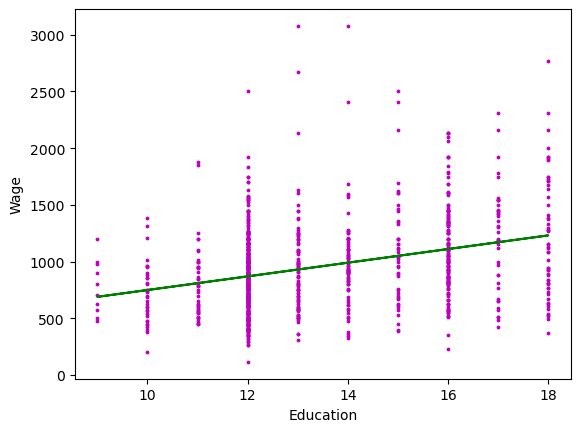

In [21]:
# Linear regression of Education and Monthly Wage
import numpy as np
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations
    n = np.size(x)
 
    # mean x and y
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # cross deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 3)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting regression line
    plt.plot(x, y_pred, color = "g")
 
    # plot
    plt.xlabel('Education')
    plt.ylabel('Wage')
    plt.show()
 
def main():
    # data
    x = (wage['educ'].to_numpy())
    y = (wage['wage'].to_numpy())
 
    # coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nβ0 = {}  \
          \nβ1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

The formula result is:

lwage= 146.952 + (60.214)educ + u

Which means that a man with no education will make 146.952 per month. And with every year of education he gets, it adds an additional 60.214 per month.

#### Step 3. Forecasting

How much does a highschool educated man make compared to someone who has never had any education?

Someone with zero education at all would make a log earning of 146.952. While someone with highschool education would make 1230.804 per month with 18 years of education.

However, if we look at the visualization you will spot many individuals with high deviation from the mean. On average you are likely to make more with continued education. This applies to a sample or population instead of a person to person basis.